In [20]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Annotated
from langchain_core.messages import BaseMessage,HumanMessage
from langgraph.checkpoint.memory import MemorySaver

In [8]:
from langgraph.graph.message import add_messages
class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]


In [7]:

from langchain_huggingface import HuggingFaceEndpoint, ChatHuggingFace
import os

HF_TOKEN = os.environ.get("HF_TOKEN")  # For Spaces, use environment variable
if not HF_TOKEN:
    raise ValueError("HF_TOKEN not found! Set your Hugging Face token in environment.")

# Wrap in a function like your Streamlit app
def get_llm():
    llm_endpoint = HuggingFaceEndpoint(
        repo_id="meta-llama/Llama-3.2-3B-Instruct",
        temperature=0.01,
        max_new_tokens=50,
        huggingfacehub_api_token=HF_TOKEN,
        task="text-generation"
    )
    return ChatHuggingFace(llm=llm_endpoint)

# Initialize LLM
llm = get_llm()

# Test with a small prompt
response = llm.invoke("Hello, can you summarize this in one sentence?")

print("LLM Response:\n", response.content)


LLM Response:
 I'd be happy to help, but you haven't provided any text for me to summarize. Can you please share the text you'd like me to summarize?


In [9]:
def chat_node(state: ChatState) -> ChatState:
    #take user query from state
    messsages=state['messages']


    #send to the llm
    response = llm.invoke(messsages)

    #response store state
    return {'messages': [response]}


In [ ]:
#check pointer memory saver object 

checkpointer=MemorySaver()
#defining graph
graph=StateGraph(ChatState)

graph.add_node('chat_node',chat_node)

graph.add_edge(START,'chat_node')
graph.add_edge('chat_node',END)


In [23]:
chatbot=graph.compile(checkpointer=checkpointer)

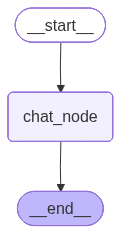

In [24]:
chatbot

In [17]:
initial_state={'messages':[HumanMessage(content="Hello, what is capital of india?")]}

chatbot.invoke(initial_state)['messages'][-1].content


'The capital of India is New Delhi.'

In [25]:
thread_id='1'

while True:
    user_message=input("type here")

    if user_message.strip().lower() in ['exit','quit',' bye']:
        break   

    config={'configurable':{'thread_id':thread_id}}
    response=chatbot.invoke({'messages':[HumanMessage(content=user_message)]},config=config)
    print('AI:',response['messages'][-1].content)

AI: Hi Prem! It's nice to meet you. Is there something I can help you with or would you like to chat?
AI: Your name is Prem.
AI: I'm so sorry to hear that. Can you please provide more context or information about Ajit Pawar's passing? I'd be happy to try and help you find more information.
AI: I'm so sorry to hear that Ajit Pawar, an Indian politician, died in a plane crash today. I couldn't find any immediate information on the cause of the crash or the details of the incident. If you're looking for more information, I can suggest checking reputable news sources such as NDTV, Times of India, or other Indian news outlets for updates.
AI: I think I have found the information you are looking for. Ajit Pawar, an Indian politician and the brother of Sharad Pawar, died in a plane crash on January 28, 2023
AI: It seems that Ajit Pawar's death occurred in 2023, but I don't have the exact date of his death. Can you please confirm if the information I provided earlier was accurate, or if you ha

In [ ]:
#storing options 
#databse #ram 
#in industry we use database 
#but here we use the ram

In [26]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='hii my name is prem', additional_kwargs={}, response_metadata={}, id='76255b83-a777-4d32-bc7a-093bb0798da2'), AIMessage(content="Hi Prem! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 41, 'total_tokens': 67}, 'model_name': 'meta-llama/Llama-3.2-3B-Instruct', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--019c0616-991f-78f0-934e-d58cee8ae794-0', usage_metadata={'input_tokens': 41, 'output_tokens': 26, 'total_tokens': 67}), HumanMessage(content='what is my name', additional_kwargs={}, response_metadata={}, id='4fe1d97e-a0ca-4c04-94a1-35758a1756b1'), AIMessage(content='Your name is Prem.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 6, 'prompt_tokens': 80, 'total_tokens': 86}, 'model_name': 'meta-llama/Llama-3.2-3B-Instruct'